# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Изучим файл с данными.

Для начала импортируем все необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np
from math import factorial
from matplotlib import pyplot as plt
from scipy import stats as st
import scipy.stats
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns

Теперь откроем файл с данными и ознакомимся с ними:

In [ ]:
games = pd.read_csv('/datasets/games.csv')

display(games)
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, что мы видим.
Много пропусков.
Посмотрим ближе:

In [ ]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Больше всего пропусков в столбцах `Critic_Score`, `User_Score`, `Rating` - это оценка критиков, пользователей и рейтинг.
Также есть немного пропусков в столбцах `Year_of_Release`, `Genre`, `Name`. 

Также имеются нулевые значения.

In [ ]:
games[games == 0].count()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
NA_sales            4508
EU_sales            5870
JP_sales           10514
Other_sales         6601
Critic_Score           0
User_Score             0
Rating                 0
dtype: int64

Нули встречаются в столбцах с количеством продаж игр.

Кроме того, столбец с оценками пользователей содержит аббревиатуру 'tbd'.

In [ ]:
games[games == 'tbd'].count()

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Name                  0
Platform              0
Year_of_Release       0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score          0
User_Score         2424
Rating                0
dtype: int64

Кроме того, стлбцы имеют в названиях заглавные буквы, а столбцы `Year_of_Release` - годы и `Critic_Score` - оценка критиков в стобальной шкале должны иметь целочисленный формат.

### Вывод:

При первичном рассмотрении данных мы обнаружили следующие проблемы:
- Заглавные буквы в названиях столбцов;
- Формат столбцов `Year_of_Release` и `Critic_Score` должны иметь целочисленый формат;
- Необходимо разобраться с аббревиатурой 'tbd' в в столбце `User_Score`;
- А также с пропусками в столбцах `Critic_Score`, `User_Score`, `Rating`,`Year_of_Release`, `Genre`, `Name`;
- И нулевыми значениями в столбцах с количеством продаж.

## Шаг 2. Подготовка данных

В соотвествии с выводом Шага 1 обработаем данные.
Избавимся от заглавных букв в названиях столбцов.

In [ ]:
games.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],axis='columns',inplace=True)

games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь изменим формат столбцов `year_of_release` и `critic_score`, так как очевидно, что годы имеют целочивленный формат и рейтинг по 100 бальной шкале тоже подразумевает целые числа.

In [ ]:
games['year_of_release'] = games['year_of_release'].astype('Int64', errors='ignore')
games['critic_score'] = games['critic_score'].astype('Int64', errors='ignore')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


Теперь разберемся с аббревиатурой 'tbd' в в столбце `user_score`.  
  
Что же это такое?  
Поиск говорит нам, что:  
_"TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято"_  
  
Что это может означать для нас?  
Первое и основное, что оценки пока нет, а значит, мы можем заменить это значение на те же `NaN`, а сам столбуц переведем в формат float.

In [ ]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [ ]:
games.loc[games.loc[:, 'user_score'] == 'tbd', 'user_score'] = np.NaN
games['user_score'] = games['user_score'].astype('float')
display(games[games['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь разберемся с пропусками в столбцах `critic_score`, `user_score`, `rating`,`year_of_release`, `genre`, `name`.  
Если пропуски в столбцах `critic_score` - оценка критиков, `user_score` - оценка пользователей, `rating` - рейтинг, действительно может отсутсвовать, так как возможно, подсчет оценки еще не окончен, или игра вышла давно и тогда учет рейтинга не велся, возможно игра не достаточно популярна...  
Но изучим немного ближе значения столбца `rating`.

In [ ]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Тут ситуация похожа на `user_score`, тут тоже есть рейтинг 'RP' - обозначающий «Рейтинг ожидается» и есть пустые значения NaN.  
Но в данном случае, так как большенство значений имеют буквенный формат, логичнее заменить пустые значения на 'RP'.
А также рейтинг 'K-A' позднее был переименован в 'E', поэтому во избежании путаницы тоже приведем его к современным значениям.

In [ ]:
games['rating']=games['rating'].fillna('RP')
games.loc[games.loc[:, 'rating'] == 'K-A', 'rating'] = 'E'

games['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [ ]:
games['rating'].value_counts()

RP      6769
E       3993
T       2961
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64

Игр с рейтингом EC и AO так мало, что их можно удалить.

In [ ]:
games = games.drop(games[(games['rating'] == 'EC') | (games['rating'] == 'AO')].index)
games = games.reset_index(drop = True)

games['rating'].value_counts()

RP      6769
E       3993
T       2961
M       1563
E10+    1420
Name: rating, dtype: int64

Пропуски в столбцах `year_of_release` - год выпуска, `genre` - жанр, `name` - название игры это совсем никуда не годится.
Давайте рассмотрим их подробнее.

In [ ]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RP
14235,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP


In [ ]:
games[games['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RP
14235,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP


Строки с пропусками в столбцах `genre` и `name` оказались одними и теми же строками, к тому же их всего две.
Без сожадения можем с ними попрощаться.

In [ ]:
games.dropna(subset = ['name'], inplace = True)
games=games.reset_index(drop = True)

games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
games[games['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,RP
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,RP
...,...,...,...,...,...,...,...,...,...,...,...
16362,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16394,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16437,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16447,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,RP


А вот строк, где пропущен год выпуска - много. Однако, мы видим, что другая информация широко представлена в строках с этими пропусками.
Поэтому избавляться от этих строк не целесообразно.  
  
Также мы заметили, что в столбцах продаж `na_sales`, `eu_sales`, `jp_sales` и `other_sales` есть нулевые значения и их достаточно много. Например, из 16715 строк данных 10514 строк имеют нулевые продажи в Японии.  
Это можно списать на особенности культуры, запретов и особенностей перевода игры на другие языки.  
  
Однако, давайте проверим, а есть ли такие игры, где отсутствуют продажи во всех регионах?

In [ ]:
games[(games['na_sales'] == 0) & (games['eu_sales'] == 0) & (games['jp_sales'] == 0) & (games['other_sales'] == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16665,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,RP
16698,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,RP


Действительно, такие игры есть. Кроме того, у них также отсутствуют и данные по оценкам и рейтингу, и их всего две.
Поэтому мы без сожаления можем попрощаться и с ними тоже.

In [ ]:
games = games.drop(games[(games['na_sales'] == 0) & (games['eu_sales'] == 0) & (games['jp_sales'] == 0) & (games['other_sales'] == 0)].index)
games=games.reset_index(drop = True)

games[(games['na_sales'] == 0) & (games['eu_sales'] == 0) & (games['jp_sales'] == 0) & (games['other_sales'] == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь посчитаем суммарные продажи во всех регионах и запишием их в отдельный столбец `total_sales`.

In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16697,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16698,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16699,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16700,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


На этом подготовка данных завершена.
Мы привели данные таблицы в порядок, проанализировали все недочеты найденные на предыдущем шаге, а также посчитали суммарные продажи во всех регионах. Теперь мы можем переходить к исследовательскому анализу данных.



## Шаг 3. Исследовательский анализ данных

Основные задачи, которые стоят перед нами на этом шаге:

- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
- Посмотрить, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
- Взять данные за соответствующий актуальный период. Актуальный период определяем самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 Не учитываем в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Найти несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Итак, начнем по порядку:  
Рассмотрим сколько данных выпускалось в разные годы.

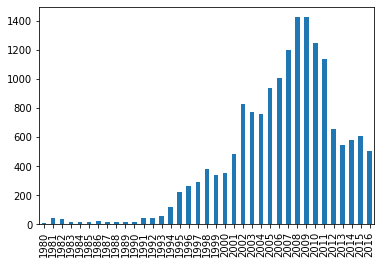

In [ ]:
games['year_of_release'].value_counts().sort_index().plot(kind='bar')

Мы видим, что до 1994 года игр выпускалось очень мало, зато потом количество практически ежегодно увеличивалось вдвое. Получается, что период до 1994 года не так важен для нас, потому что тогда игровая индустрия еще не была достаточно развита.
  
Посмотрим, как меняются продажи по платформам.

In [ ]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

platform
PS2     1255.53
X360     971.42
PS3      939.65
Wii      906.85
DS       805.47
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.43
3DS      259.00
XB       255.78
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.82
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Возьмем первые 6 платформ с намбольшими продажами PS2, X360, PS3, Wii, DS и PS, и построим распределение по годам.

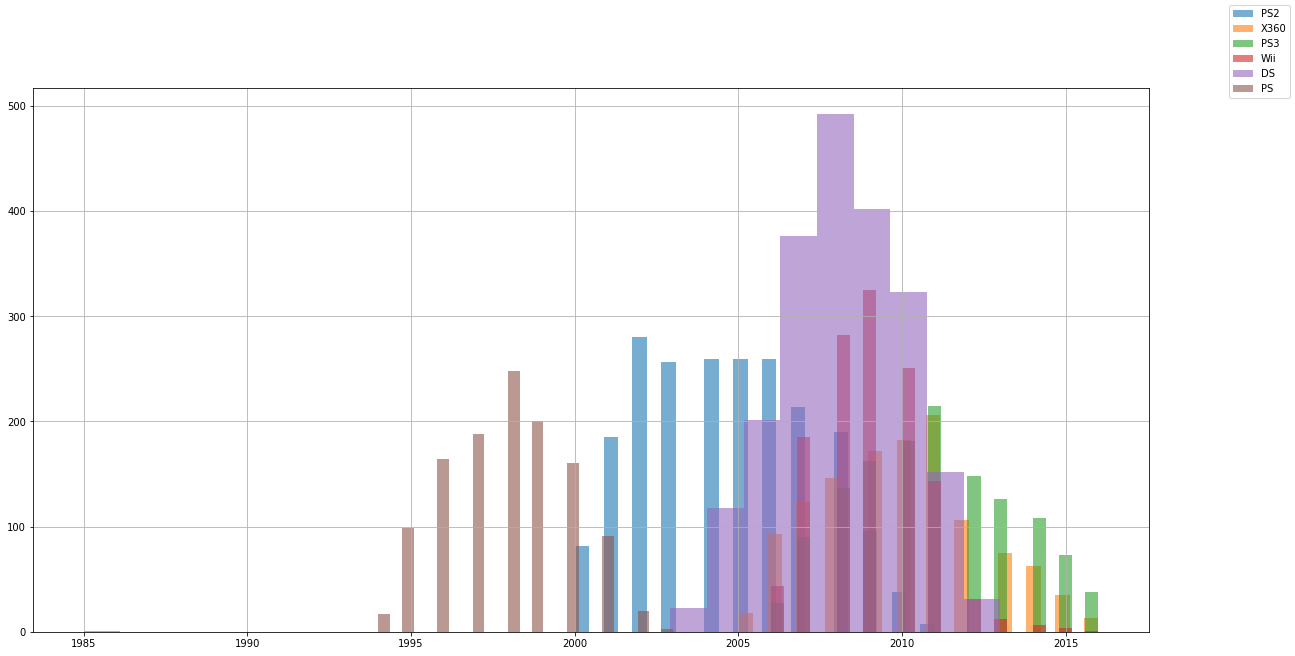

In [ ]:
fig, ax = plt.subplots() ##################

platform_years = games[['platform', 'year_of_release', 'total_sales']]

PS2_years = platform_years[(platform_years['platform'] == 'PS2')]  
X360_years = platform_years[(platform_years['platform'] == 'X360')]
PS3_years = platform_years[(platform_years['platform'] == 'PS3')]
Wii_years = platform_years[(platform_years['platform'] == 'Wii')]
DS_years = platform_years[(platform_years['platform'] == 'DS')]
PS_years = platform_years[(platform_years['platform'] == 'PS')]

PS2_years['year_of_release'].hist(bins=25, label='PS2', figsize=(20,10), alpha = 0.6)#, histtype= 'step')
X360_years['year_of_release'].hist(bins=25, label='X360', alpha = 0.6)#, histtype= 'step')
PS3_years['year_of_release'].hist(bins=25, label='PS3', alpha = 0.6)#, histtype= 'step')
Wii_years['year_of_release'].hist(bins=25, label='Wii', alpha = 0.6)#, histtype= 'step')
DS_years['year_of_release'].hist(bins=25, label='DS', alpha = 0.6)#, histtype= 'step')
PS_years['year_of_release'].hist(bins=25, label='PS', alpha = 0.6)#, histtype= 'step')

fig.legend() ##################

В 1985 году видим одну единственную игру выпущенную платформой DS, избывимся от нее для улучшения визуализации данных.

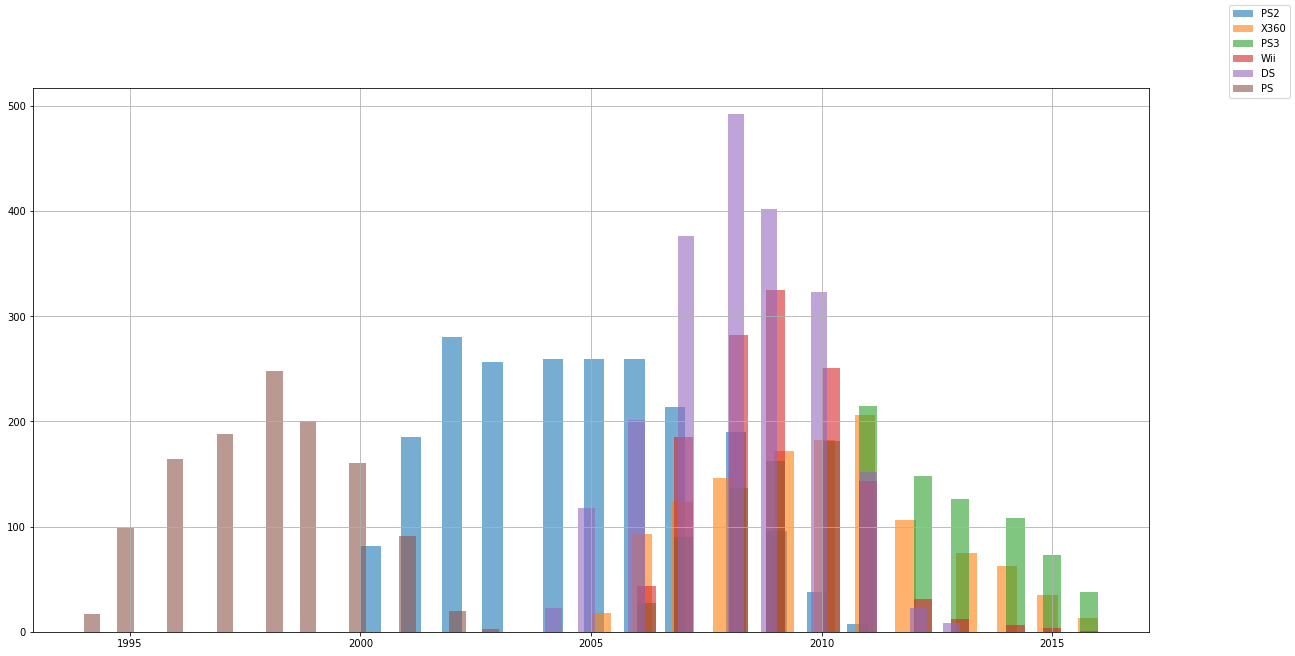

In [ ]:
fig, ax = plt.subplots() ##################

DS_years= DS_years.drop(DS_years[DS_years['year_of_release'] == 1985].index)

PS2_years['year_of_release'].hist(bins=25, label='PS2', figsize=(20,10), alpha = 0.6)
X360_years['year_of_release'].hist(bins=25, label='X360', alpha = 0.6)
PS3_years['year_of_release'].hist(bins=25, label='PS3', alpha = 0.6)
Wii_years['year_of_release'].hist(bins=25, label='Wii', alpha = 0.6)
DS_years['year_of_release'].hist(bins=25, label='DS', alpha = 0.6)
PS_years['year_of_release'].hist(bins=25, label='PS', alpha = 0.6)

fig.legend() ##################

Видим, что платформы развиваются волнообразно, распределение нормальное. Подробнее расмотрим каждую.

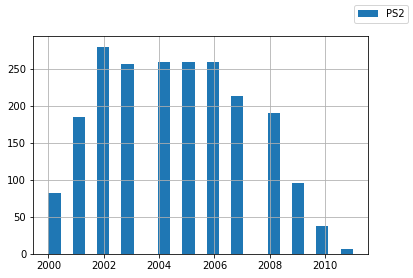

In [ ]:
fig, ax = plt.subplots() ##################
PS2_years['year_of_release'].hist(bins=25, label='PS2')
fig.legend() ##################

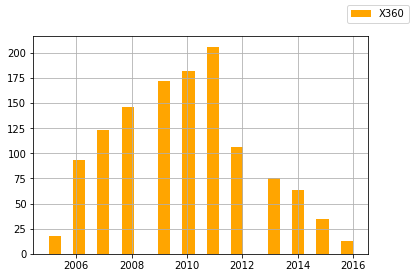

In [ ]:
fig, ax = plt.subplots() ##################
X360_years['year_of_release'].hist(bins=25, label='X360', color = 'orange')
fig.legend() ##################

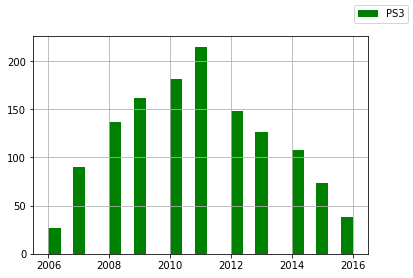

In [ ]:
fig, ax = plt.subplots() ##################
PS3_years['year_of_release'].hist(bins=25, label='PS3', color = 'green')
fig.legend() ##################

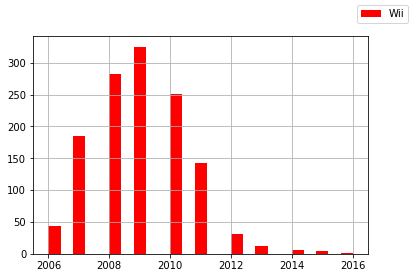

In [ ]:
fig, ax = plt.subplots() ##################
Wii_years['year_of_release'].hist(bins=25, label='Wii', color = 'red')
fig.legend() ##################

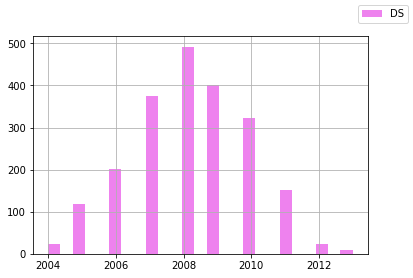

In [ ]:
fig, ax = plt.subplots() ##################
DS_years['year_of_release'].hist(bins=25, label='DS', color = 'violet')
fig.legend() ##################

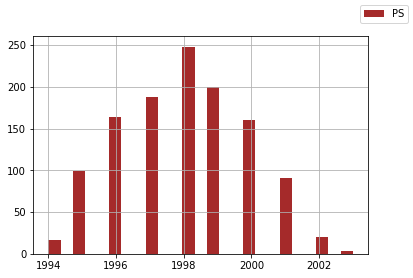

In [ ]:
fig, ax = plt.subplots() ##################
PS_years['year_of_release'].hist(bins=25, label='PS', color = 'brown')
fig.legend() ##################

Что мы видим?  
Платформа PS2 существовала с 2000 по 2011 год - это 11 лет.  
Платформа X360 с 2005 по 2016 год - 9 лет.  
PS3 - с 2006 по 2016 год - 10 лет.  
Wii - с 2006 по 2016 год - 10 лет.  
DS - с 2004 по 2013 год - 9 лет.  
И наконец PS существовал с 1994 по 2003 год - 9 лет.  
  
Получатеся, что среднее время "жизни" платформы 9.7 лет. При этом, пик продаж приходится в срднем на 5 год продаж, а ощутимый спад продаж происходит через 2-3 года после пика. Поэтому логично, для составления прогноза на 2017 год взять данные актуальных платформ около 3 лет назад, то есть 2014 год и познее.  
  
Составим новую таблицу с актуальными данными.


In [ ]:
games_actual = games[games['year_of_release'] >= 2014]
games_actual = games_actual.reset_index(drop = True)

games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


Лидирующие по продажам платформы за все время.

In [ ]:
games_history = games[games['year_of_release'] >= 2006]
games_history = games_history.reset_index(drop = True)

games_history.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

platform
X360    952.99
PS3     931.34
Wii     890.52
DS      654.70
PS4     314.14
PS2     265.80
3DS     257.81
PSP     238.63
PC      163.33
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64

С большим отрывом по общим продажам лидируют X360, PS3 и Wii. Можно сказать, что это игровые гиганты. Но врамя идет и интересно посмотреть как распределялись продажи по годам?

Лидирующие по продажам платформы по годам.

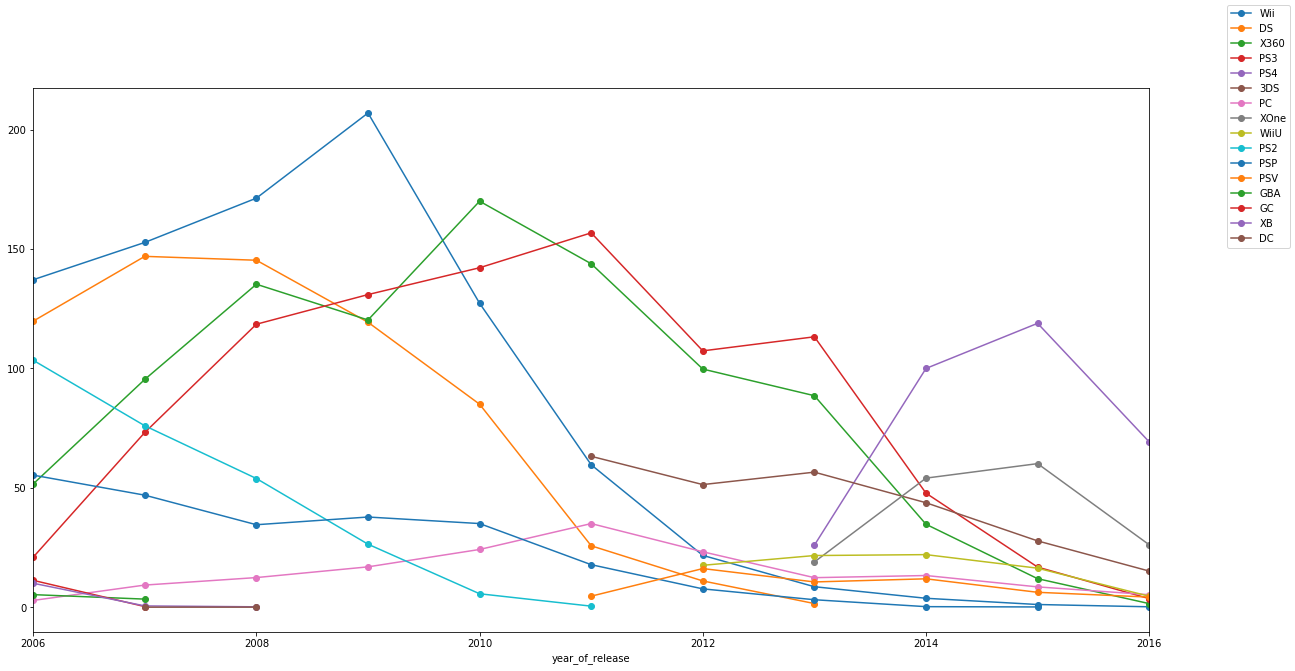

In [ ]:
def graf(x):
    games_history[(games_history['platform'] == x)] \
    .groupby('year_of_release')['total_sales'].sum() \
    .plot(x = 'year_of_release', y = 'total_sales', marker = 'o', label = x, figsize=(20,10))
    return 

fig, ax = plt.subplots() ##################
for i in games_history['platform'].unique():
    graf(i)
fig.legend() ##################

Тут становится более понятно, что тот же гигант Wii делал рекордные продажи в 2009 году, а сейчас уже почти сошел на нет... То же самое касается и X360 с PS3. 
  
В целом 2016 год для всех оказался не слишком хорошим по продажам, даже восходящие новички рынка PS4 и XOne потерпели снижение продаж, однако, их можно считать наиболее перспективными в плане развития на 2017 год.  
Потому что на 2017 год придется 5 год их становления, а если изучить графики, что становится понятно, что пик популярности и продаж в жизненом цикле платформы приходится в среднем именно на 5 год.   



Теперь подробнее изучим продажи игр. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.


Платформа PS4

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

Платформа 3DS

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

Платформа XOne

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

Платформа WiiU

count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: total_sales, dtype: float64

Платформа PS3

count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max       

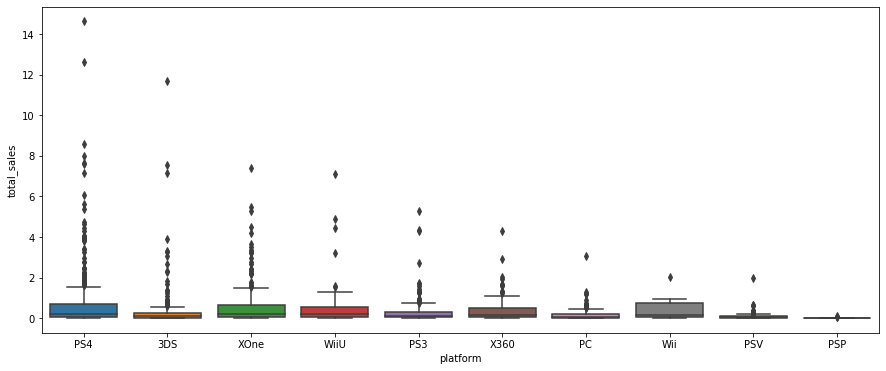

In [ ]:
platform = games_actual['platform']
total_sales = games_actual['total_sales']

plt.figure(figsize=(15, 6))
sns.boxplot(x=platform, y=total_sales)

for i in games_actual['platform'].unique():
    print('')
    print('Платформа', i)
    print('')
    print(games_actual[(games_actual['platform'] == i)]['total_sales'].describe())

Практически на всех графиках заметно, как много выбросов лежащих за пределами верхнего уса. Сам ящик очень трудно разглядеть из-за большого количества выбросов. Но атребут `.describe()` позволяет нам увидеть, что порой выбросы достигают 14,6 миллионов. При том как на всех платформах 75% продаж укладываются в цифру до 0,75 млн.  
  
Рассмотрим графики ближе обрезав их по высоте.

(0, 1.75)

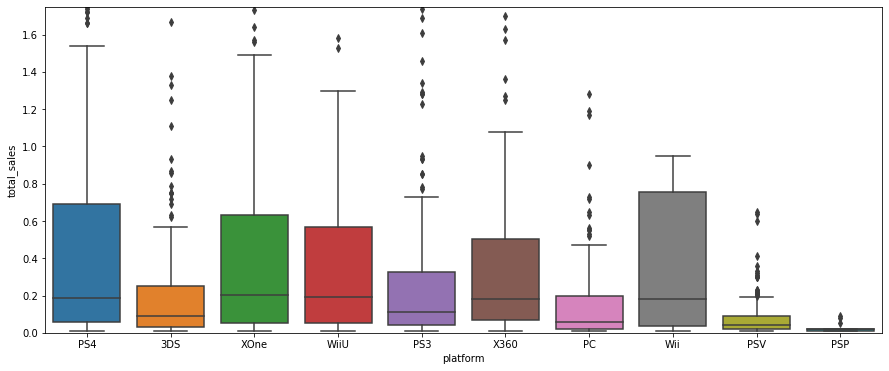

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=platform, y=total_sales)
plt.ylim(0, 1.75)

На увеличенных графиках также на графиках заметно, что медиана всегда сильно смещена вниз, что также говорит, о преобладающем количестве более низних по стоимости продаж.

Это говорит о том, что основные продажи, все же на пике рассвета популярности платформы, она может делать пиковые продаже, но в общем и целом, статистика по всем платформам, популярным и не очень, не будет уж так сильно отличаться. Большенство продаж будет сделано до 0,75 млн.

Теперь интересно, а могут ли влять на продажи отзывы пользователей и критиков?  
Рассмотрим на примере одной популярной платформы - X360.  
Построим зависимости оценок и продаж, а также посчитаем корреляцию.

,total_sales,critic_score,user_score
26,4.28,NaN,4.9
54,2.92,NaN,4.2
79,2.05,NaN,5.5
84,1.92,NaN,4.7
99,1.70,NaN,NaN



              total_sales  critic_score  user_score
total_sales      1.000000      0.525723   -0.138445
critic_score     0.525723      1.000000    0.625309
user_score      -0.138445      0.625309    1.000000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5304a22a50>,
      dtype=object)

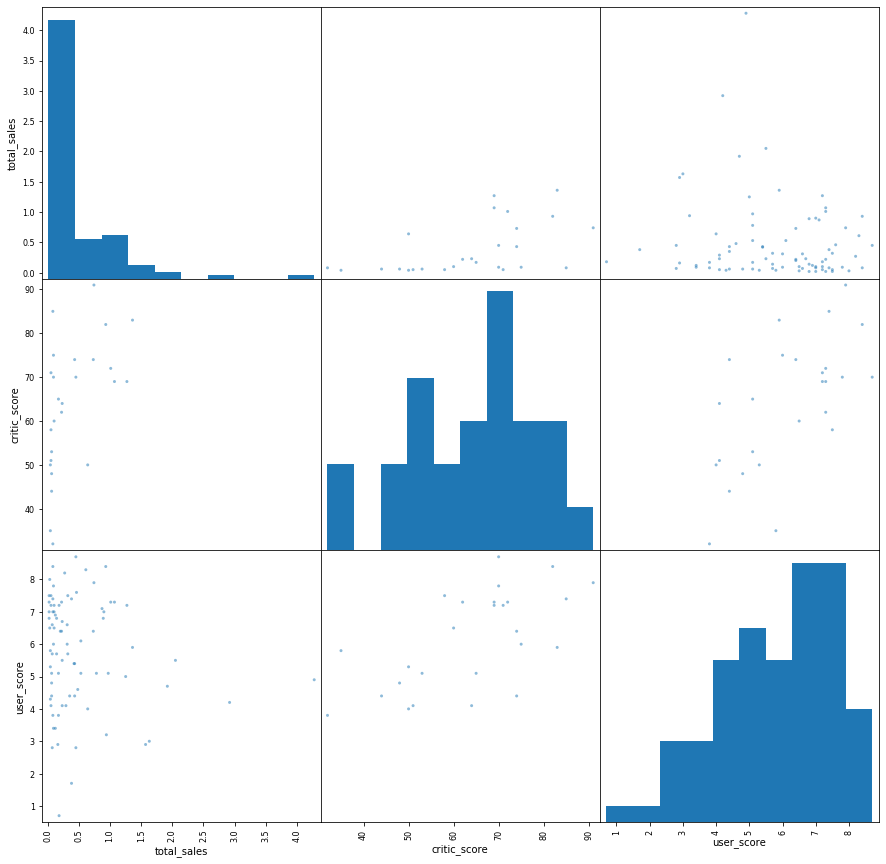

In [ ]:
X360 = games_actual[games_actual['platform'] == 'X360'][['total_sales', 'critic_score', 'user_score']]
X360 = X360.astype(float)

display(X360.head())
print()
print(X360.corr())
print('')
pd.plotting.scatter_matrix(X360, figsize = (15, 15))

Мы видим, что также как и в ящике с усами, на графиках рассеяния множество выбросов, которые не позволяют корректно оценить зависимость. Судя по графикам, мы без проблем можем отсечь продажи свыше 1,5 млн руб.

              total_sales  critic_score  user_score
total_sales      1.000000      0.525723    0.078194
critic_score     0.525723      1.000000    0.625309
user_score       0.078194      0.625309    1.000000



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5304c21250>,
      dtype=object)

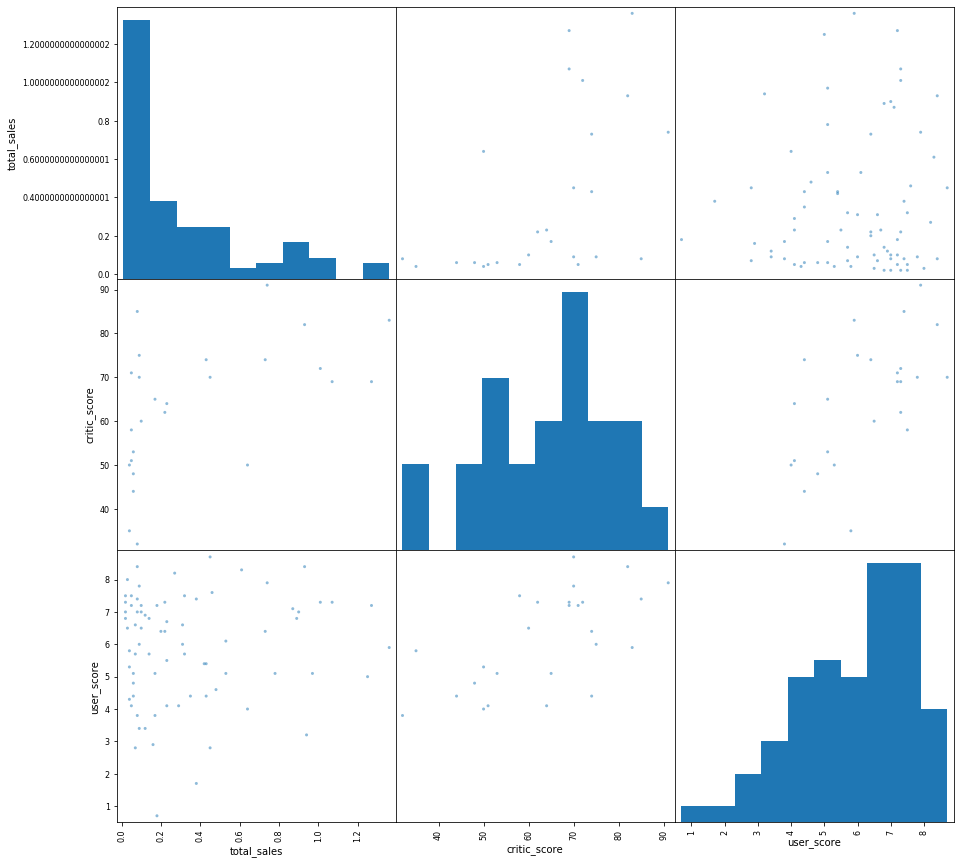

In [ ]:
X360 = X360[X360['total_sales'] < 1.5]

print(X360.corr())
print('')
pd.plotting.scatter_matrix(X360, figsize = (15, 15))

Исходя из полученных данных, мы можем говорить о том, что взяимосвязь между продажами и оценкой действительно есть и она прямопропорциональная, так как коэфициенты корреляции между оценкой критиков и продажами, а также оценкой пользователей и продажами имеет положительную величину.
Влияние ее не столь велико для оценки пользователей к продажам коэфициент корреляции составляет всего 0.08, зато для оценок критиков к продажам коэффициент кореляции 0.52. Из этого нужно заметить, что оценка критиков значительно больше влияет на продажи, нежели оценка пользователей.  

Интересно, означает ли это, что те платформы, где средняя оценка критиков больше, также имею и наибольшие средние продажи?

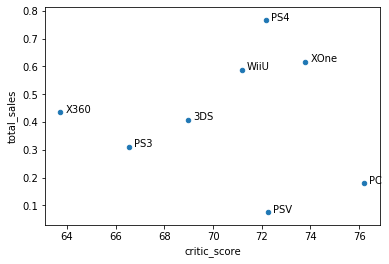

In [ ]:
critic_sales = games_actual.groupby('platform').agg({'critic_score': 'mean', 'total_sales': 'mean'})

fig, ax = plt.subplots()
critic_sales.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax)
for i in critic_sales.index:
    ax.annotate(i, (critic_sales['critic_score'][i]+0.2, critic_sales['total_sales'][i]))
fig.show()

И действительно, платформы с бОльшими продажами имеют и лучшие оценки критиков.  
  
Теперь изучим жанры, построим распределение игр по жанрам.

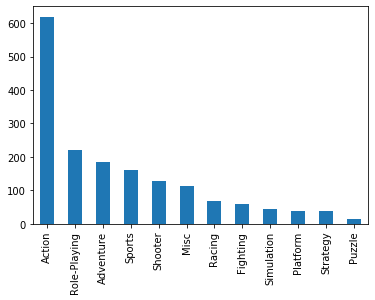

In [ ]:
games_actual['genre'].value_counts().plot(kind='bar')

Больше всего игр создается в жанре Action, он с огромным отрывом лидирует. За ним примерно с одинаковыми значениями идут Sports и Misc, а за ними еще Adventure и Role-Playing.  
Выходит что это и есть пятерка преобладающих жанров.  
  
Теперь рассмотрим, какой жанр лидирует по продажам?

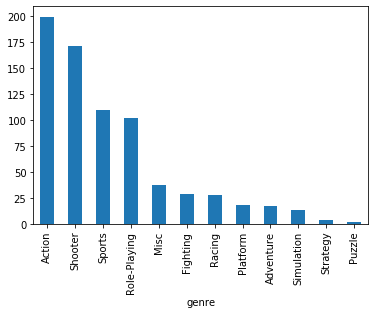

In [ ]:
games_actual.groupby('genre')['total_sales'].sum().sort_values(ascending = False).plot(kind='bar')

И снова с большим отрывом на первом месте Action, за ним Sports и Shooter, а далее Misc и Role-Playing.  
Так может они на первых местах из-за количества игр?  
Поделим сумму продаж, на количество игр и найдем, какие игры самые прибыльные?

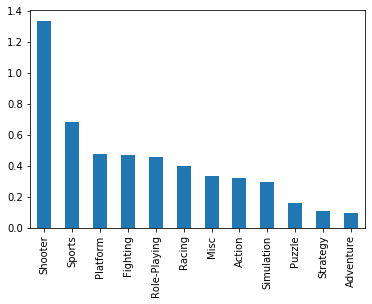

In [ ]:
(games_actual.groupby('genre')['total_sales'].sum()/games_actual['genre'].value_counts()).sort_values(ascending = False).plot(kind='bar')

И тут выходит, что везде возглавлявший списки Action уже далеко не на первом месте.
А самыми продаваемыми играми будут игры жанром Shooter и Platform, сильно выделяющиеся на форе остальных.

### Вывод.

Итак на шаге 3 мы выяснили:
- до 1994 года игровая индустрия была развита крайне мало,
- средний "жизненный цикл" платформы стосавляет 9,7 лет,
- мы взяли актуальные данные с 2006 по 2016 годы,
- самыми перспективными на предстоящий 2017 год можно считать платформы PS4 и XOne,
- большинство продаж по платформам проходят до 0,7 млн, но во время пика популярность продажи могут достигать 82 млн,
- оценка пользователей и критиков действительно имеет некоторое влияние на продажи, однако ощутимее влияет все-таки именно оценка критиков,
- жанр Action лидирует по количество продаж и количеству игр, однако, самой продаваемым в пересчете на доли он не стал,
- самый продаваемый жанр Shooter.

## Шаг 4. Составим портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Северная Америка.

In [ ]:
print('')
print('Продажи по платформам в Северной Америке')
print('')
print(games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending = False))

print('')
print('Продажи по жанрам в Северной Америке')
print('')
print(games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending = False))

print('')
print('Продажи от рейтинга ESRB в Северной Америке')
print('')
print(games_actual.groupby('rating')['na_sales'].sum().sort_values(ascending = False))


Продажи по платформам в Северной Америке

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64

Продажи по жанрам в Северной Америке

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

Продажи от рейтинга ESRB в Северной Америке

rating
M       96.42
RP      64.72
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64


Рейтинг ESRB: 
EC - Для детей младшего возраста;  
E - Для всех;  
M - Для взрослых;  
T - Подросткам;  
E10+ - Для всех от 10 лет и старше;  
RP - Рейтинг ожидается;  
EC - Для детей младшего возраста.


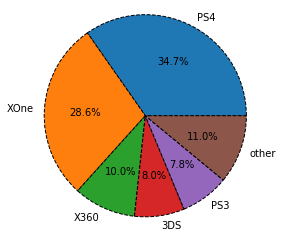

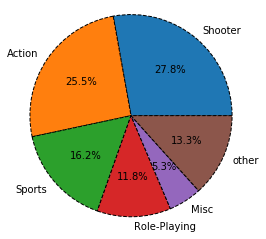

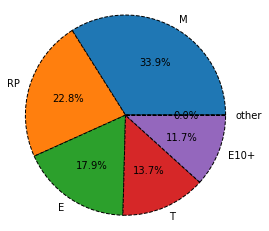

In [ ]:
vals = games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()
vals_1 = games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
vals['other'] =sum(vals_1)-sum(vals)
labels = vals.index

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals, labels=labels, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()


vals_g = games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()
vals_g_1 = games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
vals_g['other'] =sum(vals_g_1)-sum(vals_g)
labels_g = vals_g.index

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals_g, labels=labels_g, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()

vals_r = games_actual.groupby('rating')['na_sales'].sum().sort_values(ascending = False).head()
vals_r_1 = games_actual.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
vals_r['other'] =sum(vals_r_1)-sum(vals_r)
labels_r = vals_r.index 

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals_r, labels=labels_r, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()

print('Рейтинг ESRB: ') 
print('EC - Для детей младшего возраста;  ') 
print('E - Для всех;  ')
print('M - Для взрослых;  ')
print('T - Подросткам;  ')
print('E10+ - Для всех от 10 лет и старше;  ')
print('RP - Рейтинг ожидается;  ')
print('EC - Для детей младшего возраста.')

В Северной Америке самыми продаваемыми платформами стали: PS4, XOne, X360, за ними следуют 3DC и PS3.
В ТОП-5 жанров мы видим Shooter, Action, Sports, далее Role-Playing и Misc.
Самые продаваемые игры в Северной Америке идут с рейтингами "Для взрослых" и "Рейтинг ожидается".

### Европа.

In [ ]:
print('')
print('Продажи по платформам в Европе')
print('')
print(games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending = False))

print('')
print('Продажи по жанрам в Европе')
print('')
print(games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending = False))

print('')
print('Продажи от рейтинга ESRB в Европе')
print('')
print(games_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending = False))


Продажи по платформам в Европе

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
X360     15.49
WiiU     13.15
PSV       3.53
Wii       2.59
PSP       0.00
Name: eu_sales, dtype: float64

Продажи по жанрам в Европе

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64

Продажи от рейтинга ESRB в Европе

rating
M       93.44
RP      58.95
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64


Рейтинг ESRB: 
EC - Для детей младшего возраста;  
E - Для всех;  
M - Для взрослых;  
T - Подросткам;  
E10+ - Для всех от 10 лет и старше;  
RP - Рейтинг ожидается;  
EC - Для детей младшего возраста.


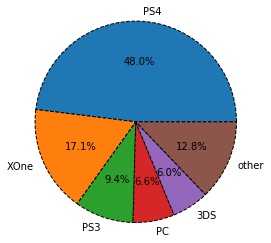

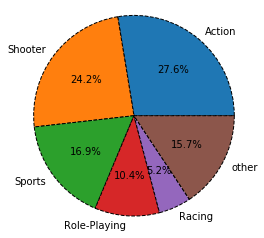

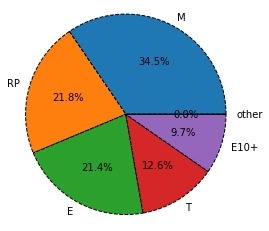

In [ ]:
vals = games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()
vals_1 = games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
vals['other'] =sum(vals_1)-sum(vals)
labels = vals.index

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals, labels=labels, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()


vals_g = games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()
vals_g_1 = games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
vals_g['other'] =sum(vals_g_1)-sum(vals_g)
labels_g = vals_g.index

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals_g, labels=labels_g, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()

vals_r = games_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).head()
vals_r_1 = games_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
vals_r['other'] =sum(vals_r_1)-sum(vals_r)
labels_r = vals_r.index 

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals_r, labels=labels_r, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()

print('Рейтинг ESRB: ') 
print('EC - Для детей младшего возраста;  ') 
print('E - Для всех;  ')
print('M - Для взрослых;  ')
print('T - Подросткам;  ')
print('E10+ - Для всех от 10 лет и старше;  ')
print('RP - Рейтинг ожидается;  ')
print('EC - Для детей младшего возраста.')

В Европе лидирующие платформы: PS4, XOne и PS3, ТОП-5 закрывают PS и 3DS.
Европейцы больше предпочитают игры жанров Action, Sports и Shooter, далее уже идут Role-Playing и Racing.
По рейтингу ESRB игры "Для взрослых", "Без рейтинга" и "Для всех" лидируют.

### Япония.

In [ ]:
print('')
print('Продажи по платформам в Японии')
print('')
print(games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending = False))

print('')
print('Продажи по жанрам в Японии')
print('')
print(games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending = False))

print('')
print('Продажи от рейтинга ESRB в Японии')
print('')
print(games_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending = False))


Продажи по платформам в Японии

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
PSP      0.36
XOne     0.32
X360     0.08
Wii      0.00
PC       0.00
Name: jp_sales, dtype: float64

Продажи по жанрам в Японии

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64

Продажи от рейтинга ESRB в Японии

rating
RP      56.90
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64


Рейтинг ESRB: 
EC - Для детей младшего возраста;  
E - Для всех;  
M - Для взрослых;  
T - Подросткам;  
E10+ - Для всех от 10 лет и старше;  
RP - Рейтинг ожидается;  
EC - Для детей младшего возраста.


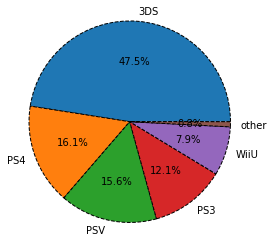

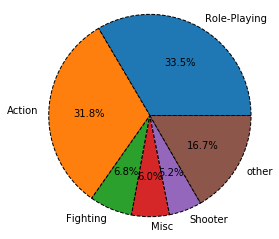

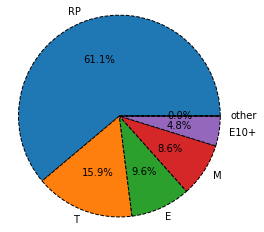

In [ ]:
vals = games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()
vals_1 = games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
vals['other'] =sum(vals_1)-sum(vals)
labels = vals.index

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals, labels=labels, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()


vals_g = games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()
vals_g_1 = games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
vals_g['other'] =sum(vals_g_1)-sum(vals_g)
labels_g = vals_g.index

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals_g, labels=labels_g, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()

vals_r = games_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).head()
vals_r_1 = games_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
vals_r['other'] =sum(vals_r_1)-sum(vals_r)
labels_r = vals_r.index 

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(vals_r, labels=labels_r, radius=1, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
fig.show()

print('Рейтинг ESRB: ') 
print('EC - Для детей младшего возраста;  ') 
print('E - Для всех;  ')
print('M - Для взрослых;  ')
print('T - Подросткам;  ')
print('E10+ - Для всех от 10 лет и старше;  ')
print('RP - Рейтинг ожидается;  ')
print('EC - Для детей младшего возраста.')

В Японии по прадажам подавляющую часть занимает платформа 3DS, потом уже идут PS4, PSV, и совсем немного занимают PS3 и WiiU.
В жанрах Япония тоже отличается. Лидирует Role-Playing, за ним идет Action и не знакомый нам ранее Fighting.  
Самые продаваемые игры в Японии имеют рейтинг RP, то есть не имею пока рейтинга по шкале ESRB. За ней следуют продажи игр с рейтингом "Для подростков" и "Для всех".

### Вывод

Итак, подводя итог мы можем составить мини портреты пользователей и собрать все данные во едино. Мы узнали, что:
- пользователи Северной Америки и Европы чаще всего покупают игры платформ PS4 и XOne, тогда как пользователи Японии имеют в лидерах совсем другие платформы - 3DS и PSV;
- пользователи Северной Америки и Европы больше покупают жанры Action, Sports, Shooter, тогда как пользователи из Японии выбирают совсем другие жанры - Pole-Playing, Action и Fighting;
- также у Американцев и Европейцов лидируют игры с рейтингом "Для взрослых", а у Японцев в почете игры "Для подростков".

Из всего этого, можно сделать вывод, что портреты пользователей из Северной Америки и Европы очень похожи, а вот пользователи Японии имеют совершенно иные предпочтения.

## Шаг 5. Проверим гипотезы  
  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Начнем с первой гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". В качестве нулевой гипотезы H0 мы возьмем утрерждение "Средние пользовательские рейтинги платформ Xbox One и PC равны". Соотвественно в качестве двусторонней альтернативной гипотезы H1 будет "Средние пользовательские рейтинги платформ Xbox One и PC отличаются". Нам не важно что будет меньше, а что больше. Главное, что они не равны.

Нам нужно посчитать вероятность того, что средняя оценка пользователей платформы Xbox One равна средней оценке пользователей платформы PC. Для этого воспользуемся тестом `scipy.stats.ttest_ind`. Пороговое значение альфа примем равным 0,05.

In [ ]:
XOne = games_actual[(games_actual['platform'] == 'XOne') & (games_actual['user_score'] > 0)]['user_score']
PC = games_actual[(games_actual['platform'] == 'PC') & (games_actual['user_score'] > 0)]['user_score']
alpha = 0.05

results = st.ttest_ind(XOne, PC)

print(' ')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

 
p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Вероятность того, что средняя оценка пользователей платформы Xbox One равна средней оценке пользователей платформы PC составляет 10%. Это означает, что мы не можем отвергнуть нулевую гипотезу и с некоторой долей вероятности можно судить о том, что средние пользовательские рейтинги платформ Xbox One и PC похожи.  
То есть гипотеза подтвердилась.
  
  
  
  
Теперь проверим вторую гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные". В качестве нулевой гипотезы H0 мы возьмем утрерждение "Средние пользовательские рейтинги жанров Action и Sports равны". Соотвественно в качестве двусторонней альтернативной гипотезы H1 будет "Средние пользовательские рейтинги жанров Action и Sports отличаются".

Воспользуемся тестом scipy.stats.ttest_ind. Пороговое значение альфа примем равным 0,05.

In [ ]:
Action = games_actual[(games_actual['genre'] == 'Action') & (games_actual['user_score'] > 0)]['user_score']
Sports = games_actual[(games_actual['genre'] == 'Sports') & (games_actual['user_score'] > 0)]['user_score']
alpha = 0.05

results = st.ttest_ind(Action, Sports)

print(' ')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

 
p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


Вероятность того, что средние пользовательские рейтинги жанров Action и Sports одинаковые практически нулевая, поэтому мы отвергаем нулевую гипотезу и с некоторой долей вероятности можем утверждать, что, действительно, средние пользовательские рейтинги жанров Action и Sports разные.  
А значит эта гипотеза подтсведилась.

### Вывод.
Гипотеза о том, что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердилась, но судить о их сходстве мы можем лишь отчасти, с определенной долей вероятности.
А вот гипотеза о том, что "Средние пользовательские рейтинги жанров Action и Sports разные" также подтвердилась и обратное имеет крайне низкую вероятность.

## Вывод.



В данном проекте мы работали с историческими данными об интернет играх. Нашей целью было изучение данных и обнаружение закономерностей между разными критериями данных и продажами.  
В ходе работы вы изучили исходные данные, провели подготовку данных к исследованию: разобрались с пропусками и не типичными значениями в ячейках. Привели данные к нужному формату.  
Далее в ходе исследования мы узнали, что:
- средний "жизненный цикл" платформы стосавляет 9,7 лет, пик продаж приходится всреднем на 5 год существования,
- самыми перспективными на предстоящий 2017 год можно считать платформы PS4 и XOne,
- оценка пользователей и критиков действительно имеет некоторое влияние на продажи, однако ощутимее влияет все-таки именно оценка критиков,
- предпочтения пользователей Северной Америли и Европы очень схожи, а вот предпочтения пользователей из Японии совсем другие.  
   
Также мы проверили две гипотезы и выяснили, что средние пользовательские рейтинги платформ Xbox One и PC похожи, а также что средние пользовательские рейтинги жанров Action и Sports разные.